### Importing libraries

In [1]:
#Importing libraries
import sys, os
import numpy as np
import pandas as pd

import pickle as pkl

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import scipy

import seaborn as sns

import pdb

from plotting_functions import *

### Set whether to use manuscript results or own trained models

In [2]:
#FOLDER LOCATIONS
ROOT_PATH = '/'.join(os.getcwd().split('/')[:-2])
folder_path = f'{ROOT_PATH}/Plot_results/MNIST/'

use_manuscript_training = True

if use_manuscript_training:
    data_path = folder_path + f'data/manuscript/prueba/'
    figures_path = folder_path + f'figures/manuscript/'
else:
    data_path = folder_path + f'data/personal/'
    figures_path = folder_path + f'figures/personal/'

### Setting colors, fonts and dpi

In [4]:
#Plot parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'DejaVu Sans'

#Defining color palettes

cmap_bright = sns.color_palette(['#4477AA', '#66CCEE', '#228833', '#CCBB44','#EE6677','#BBBBBB'],6)
cmap_pale = sns.color_palette(['#BBCCEE', '#CCEEFF', '#CCDDAA', '#EEEEBB','#FFCCCC','#DDDDDD'],6)
cmap_dark = sns.color_palette(['#222255', '#225555', '#225522', '#666633','#663333','#555555'],6)

cmap_bright_vae_eavae = sns.color_palette(['#4477AA','#EE6677'],2)
cmap_pale_vae_eavae = sns.color_palette(['#BBCCEE','#FFCCCC'],2)
cmap_dark_vae_eavae = sns.color_palette(['#222255','#663333'],2)

color_vae = cmap_bright[0]
color_eavae = cmap_bright[4]

### Import previously saved data (if plotting own model, run before this, the eval_mnist.ipynb Notebook)

In [6]:
#Importing data

with open(data_path +'x_ori.pkl', 'rb') as f:
    x_ori = pkl.load(f)
with open(data_path +'x_vae.pkl', 'rb') as f:
    x_vae = pkl.load(f)
with open(data_path +'x_eavae.pkl', 'rb') as f:
    x_eavae = pkl.load(f)
with open(data_path +'x_med_ori.pkl', 'rb') as f:
    x_med_ori = pkl.load(f)
with open(data_path +'x_med_vae.pkl', 'rb') as f:
    x_med_vae = pkl.load(f)
with open(data_path +'x_med_eavae.pkl', 'rb') as f:
    x_med_eavae = pkl.load(f)
with open(data_path +'x_fash_ori.pkl', 'rb') as f:
    x_fash_ori = pkl.load(f)
with open(data_path +'x_fash_vae.pkl', 'rb') as f:
    x_fash_vae = pkl.load(f)
with open(data_path +'x_fash_eavae.pkl', 'rb') as f:
    x_fash_eavae = pkl.load(f)
with open(data_path +'x_nat_ori.pkl', 'rb') as f:
    x_nat_ori = pkl.load(f)
with open(data_path +'x_nat_vae.pkl', 'rb') as f:
    x_nat_vae = pkl.load(f)
with open(data_path +'x_nat_eavae.pkl', 'rb') as f:
    x_nat_eavae = pkl.load(f)
with open(data_path +'x_shuff_ori.pkl', 'rb') as f:
    x_shuff_ori = pkl.load(f)
with open(data_path +'x_shuff_vae.pkl', 'rb') as f:
    x_shuff_vae = pkl.load(f)
with open(data_path +'x_shuff_eavae.pkl', 'rb') as f:
    x_shuff_eavae = pkl.load(f)

uncertainty_df = pd.read_pickle(data_path + 'uncertainty_df')
zmu_eavae_df = pd.read_pickle(data_path + 'zmu_eavae_df')
uncertainty_vae_eavae_df = pd.read_pickle(data_path + 'uncertainty_vae_eavae_df')
num_uncertain_var_vae = np.load(data_path + 'num_uncertain_var_vae.npy')
num_uncertain_var_eavae = np.load(data_path + 'num_uncertain_var_eavae.npy')
num_avimg = np.load(data_path + 'num_avimg.npy')

int_cat_unc_vaes = np.load(data_path +'int_cat_unc_vaes.npy')
int_cat_unc_eavaes = np.load(data_path +'int_cat_unc_eavaes.npy')
int_cat_zmu_eavaes = np.load(data_path +'int_cat_zmu_eavaes.npy')
interpolation_img_in_vaes = np.load(data_path +'interpolation_img_in_vaes.npy')
interpolation_img_in_eavaes = np.load(data_path +'interpolation_img_in_eavaes.npy')

vae_fit = np.load(data_path +'vae_fit.npy')
eavae_fit = np.load(data_path +'eavae_fit.npy')

med_mat_vae = np.load(data_path +'med_mat_vae.npy')
med_mat_eavae = np.load(data_path +'med_mat_eavae.npy')
shuff_mat_vae = np.load(data_path +'shuff_mat_vae.npy')
shuff_mat_eavae = np.load(data_path +'shuff_mat_eavae.npy')

predicts_vae = np.load(data_path +'predicts_vae_2_5.npy')
predicts_eavae = np.load(data_path +'predicts_eavae_2_5.npy')

entropies_all_vae = np.load(data_path +'entropies_all_vae.npy')
entropies_all_eavae = np.load(data_path +'entropies_all_eavae.npy')

with open(data_path+'test_category_mu_vae.pkl', 'rb') as f:
    test_category_mu_vae = pkl.load(f)
with open(data_path+'test_category_cov_vae.pkl', 'rb') as f:
    test_category_cov_vae = pkl.load(f)
with open(data_path+'test_indexes_per_category.pkl', 'rb') as f:
    test_indexes_per_category = pkl.load(f)
with open(data_path+'num_test_mu_vae.pkl', 'rb') as f:
    num_test_mu_vae = pkl.load(f)
with open(data_path+'num_test_var_vae.pkl', 'rb') as f:
    num_test_var_vae = pkl.load(f)

with open(data_path+'test_category_mu_eavae.pkl', 'rb') as f:
    test_category_mu_eavae = pkl.load(f)
with open(data_path+'test_category_cov_eavae.pkl', 'rb') as f:
    test_category_cov_eavae = pkl.load(f)
with open(data_path+'num_test_mu_eavae.pkl', 'rb') as f:
    num_test_mu_eavae = pkl.load(f)
with open(data_path+'num_test_var_eavae.pkl', 'rb') as f:
    num_test_var_eavae = pkl.load(f)

### In-distribution vs out-of-distribution reconstructions and latent uncertainty

/tmp/ipykernel_19812/3746405923.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


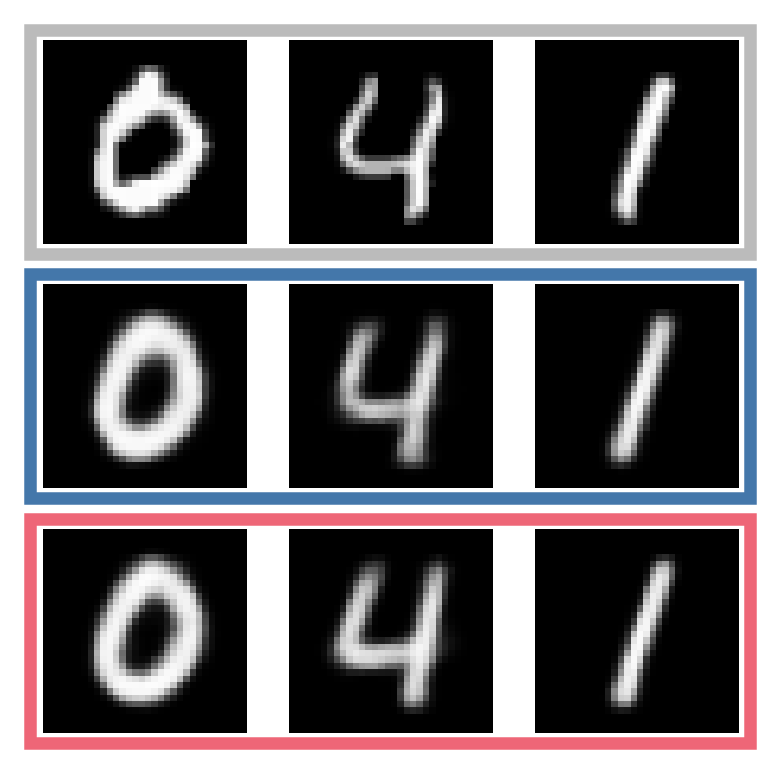

In [7]:
#ID MNIST reconstructions
fig, ax = plt.subplots(3, 3, figsize=(3,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[5], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i in range(3):
    ax[0, i].imshow(x_ori[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(x_vae[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(x_eavae[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()

#plt.savefig(figures_path+"mnist_recs.svg", format="svg", dpi=300)

/tmp/ipykernel_19812/1097663575.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


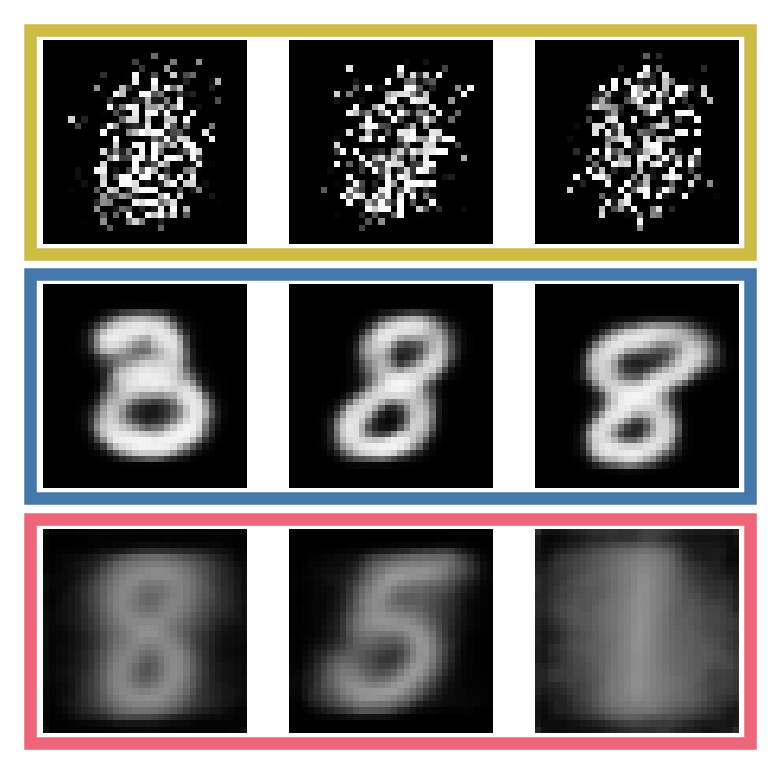

In [8]:
#OOD ShuffledMNIST Reconstructions
fig, ax = plt.subplots(3, 3, figsize=(3,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[3], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i in range(3):
    ax[0, i].imshow(x_shuff_ori[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(x_shuff_vae[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(x_shuff_eavae[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()
#plt.savefig(figures_path+"shuff_recs.svg", format="svg", dpi=300)

/tmp/ipykernel_19812/928580061.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


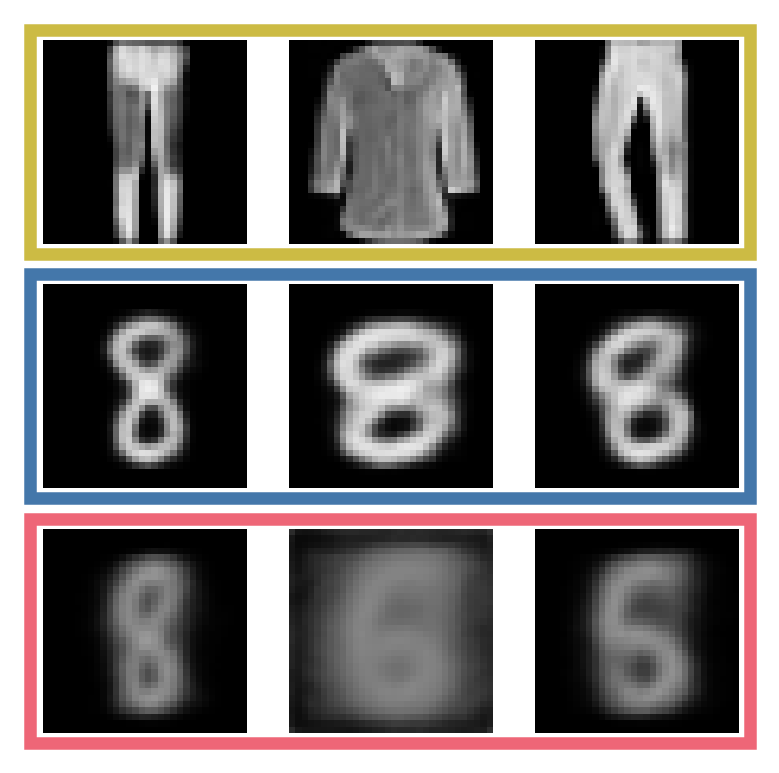

In [9]:
#OOD FashionMNIST Reconstructions
fig, ax = plt.subplots(3, 3, figsize=(3,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[3], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i in range(3):
    ax[0, i].imshow(x_fash_ori[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(x_fash_vae[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(x_fash_eavae[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()
#plt.savefig(figures_path+"fashion_recs.svg", format="svg", dpi=300)

/tmp/ipykernel_19812/1597053829.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


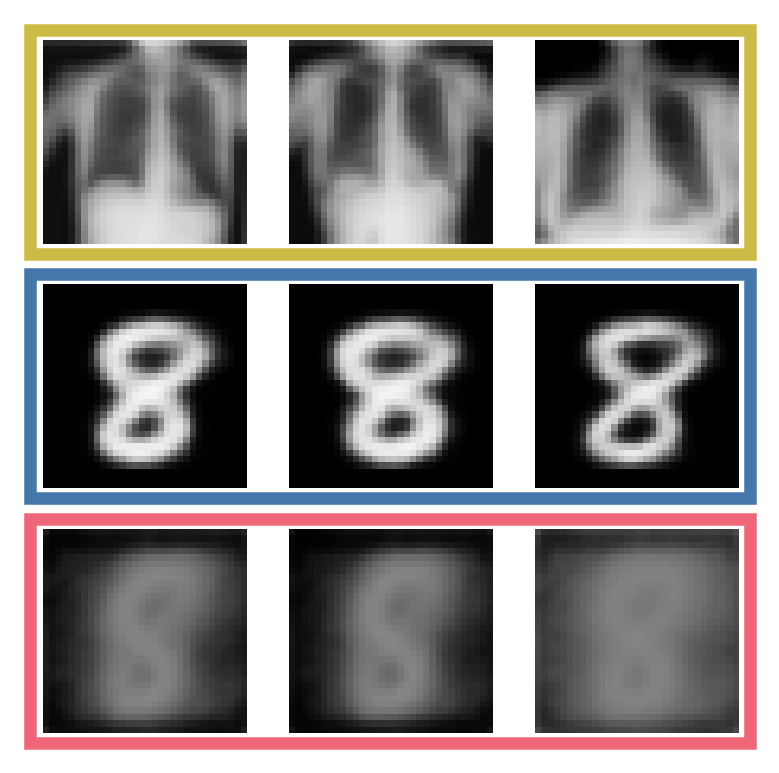

In [10]:
#OOD ChestMNIST Reconstructions
fig, ax = plt.subplots(3, 3, figsize=(3,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[3], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i in range(3):
    ax[0, i].imshow(x_med_ori[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(x_med_vae[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(x_med_eavae[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()
#plt.savefig(figures_path+"chest_recs.svg", format="svg", dpi=300)

/tmp/ipykernel_19812/3998525170.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


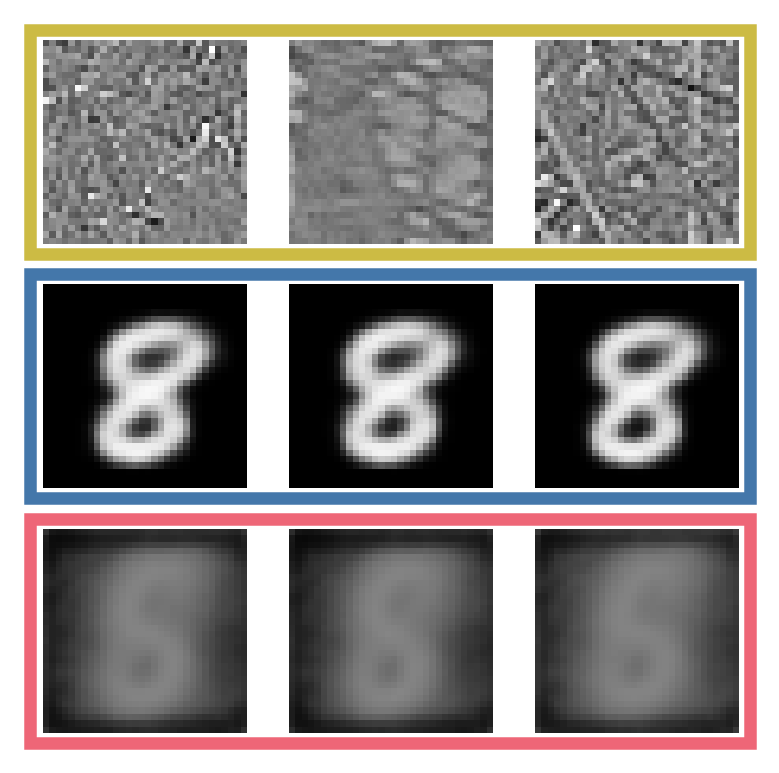

In [11]:
#OOD Natural Reconstructions
fig, ax = plt.subplots(3, 3, figsize=(3,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[3], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=113, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i in range(3):
    ax[0, i].imshow(x_nat_ori[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(x_nat_vae[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(x_nat_eavae[i].reshape(32,32).squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()
#plt.savefig(figures_path+"nat_recs.svg", format="svg", dpi=300)

/home/jcatoni/anaconda3/envs/demo_env/lib/python3.11/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.13333333333333333, 0.13333333333333333, 0.3333333333333333)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/jcatoni/anaconda3/envs/demo_env/lib/python3.11/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.4, 0.2, 0.2)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


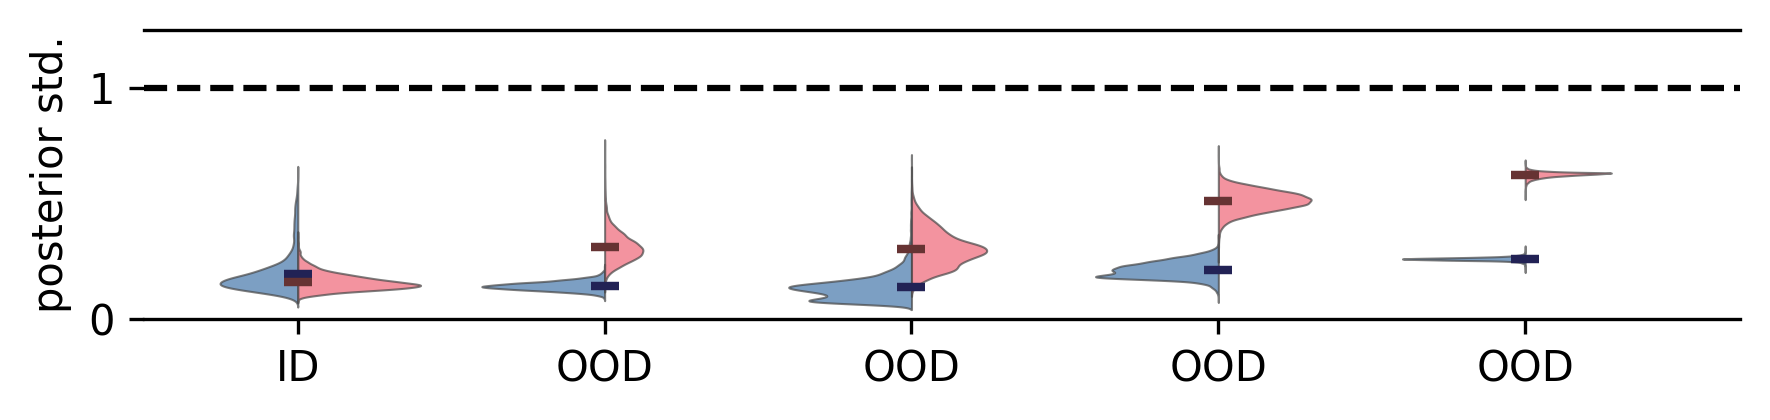

In [12]:
#Latent noise std. ID vs OOD. VAE vs EAVAE
plt.figure(figsize=(6,1.5))
ax=sns.violinplot(data=uncertainty_df, x="data-set", y="uncertainty", hue="model",
                  split=True, inner=None,linewidth=.5,palette=cmap_bright_vae_eavae,saturation=1.,gridsize=4000,
                  density_norm='area',common_norm=True,width=0.8)

plt.setp(ax.collections, alpha=.7)
plt.axhline(1,color='black',ls='--',label=r'prior')
sns.pointplot(data=uncertainty_df, x="data-set", y="uncertainty", hue="model",
              linestyles = '',markers='_',palette=cmap_dark_vae_eavae,errwidth=0.0)
plt.xlim(-.5,4.7)
plt.xticks([0,1,2,3,4],['','','','',''])
plt.xticks([0,1,2,3,4],['ID','OOD', 'OOD','OOD','OOD'])
plt.yticks([0,1])
plt.ylim(0,1.25)

plt.ylabel('posterior std.')
plt.xlabel('')
plt.legend('',frameon=False)
plt.gca().spines[['right', 'left']].set_visible(False)
plt.tight_layout()

#plt.savefig(figures_path+"noise_ood.svg", format="svg", dpi=300)

/home/jcatoni/anaconda3/envs/demo_env/lib/python3.11/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.4, 0.2, 0.2), (0.4, 0.2, 0.2), (0.4, 0.2, 0.2), (0.4, 0.2, 0.2), (0.4, 0.2, 0.2)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


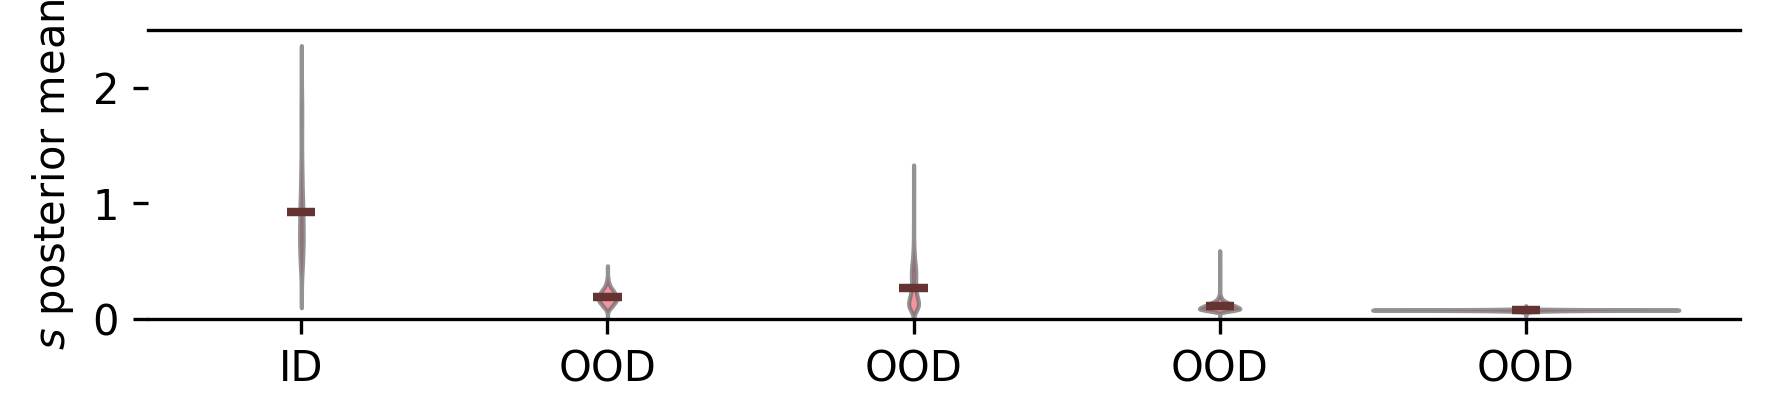

In [13]:
#Latent scaling variable ID vs OOD
plt.figure(figsize=(6,1.5))
ax=sns.violinplot(data=zmu_eavae_df, x="data-set", y="z_mu",
                  inner=None,linewidth=1,color=cmap_bright_vae_eavae[1],saturation=1.,gridsize=4000,
                  scale_hue=False,width=1)

plt.setp(ax.collections, alpha=.7)
#plt.axhline(1,color='black',ls='--',label=r'prior')
sns.pointplot(data=zmu_eavae_df, x="data-set", y="z_mu",
              linestyles = '',markers='_',color=cmap_dark_vae_eavae[1],errwidth=0.0)
plt.xlim(-.5,4.7)
plt.xticks([0,1,2,3,4],['ID','OOD', 'OOD','OOD','OOD'])
plt.yticks([0,1,2,3])
plt.ylim(0,2.5)

plt.ylabel(r'$s$ posterior mean')
plt.xlabel('')
plt.legend('',frameon=False)
plt.gca().spines[['right', 'left']].set_visible(False)
plt.tight_layout()
#plt.savefig(figures_path+"scaling_ood.svg", format="svg", dpi=300)

### Uncertainty for ID vs 'average' image

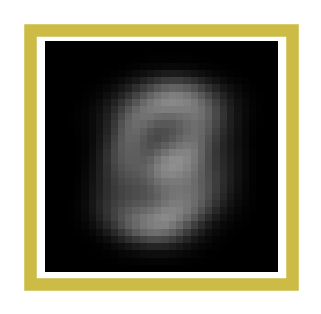

In [16]:
#Average image
fig, ax = plt.subplots(figsize=(1,1))
plt.imshow(num_avimg.squeeze(), aspect="auto", cmap='gray',vmin=0,vmax=1)
plt.axis("off")
rect_ori = plt.Rectangle((-2.5,-0.05), width=36, height=1.1,
                     transform=ax.get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[3], facecolor="none", linewidth=3)
ax.add_patch(rect_ori)

#plt.savefig(figures_path+"mnist_avgimg.svg", format="svg", dpi=300)

/home/jcatoni/anaconda3/envs/demo_env/lib/python3.11/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.26666666666666666, 0.4666666666666667, 0.6666666666666666)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/jcatoni/anaconda3/envs/demo_env/lib/python3.11/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.9333333333333333, 0.4, 0.4666666666666667)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


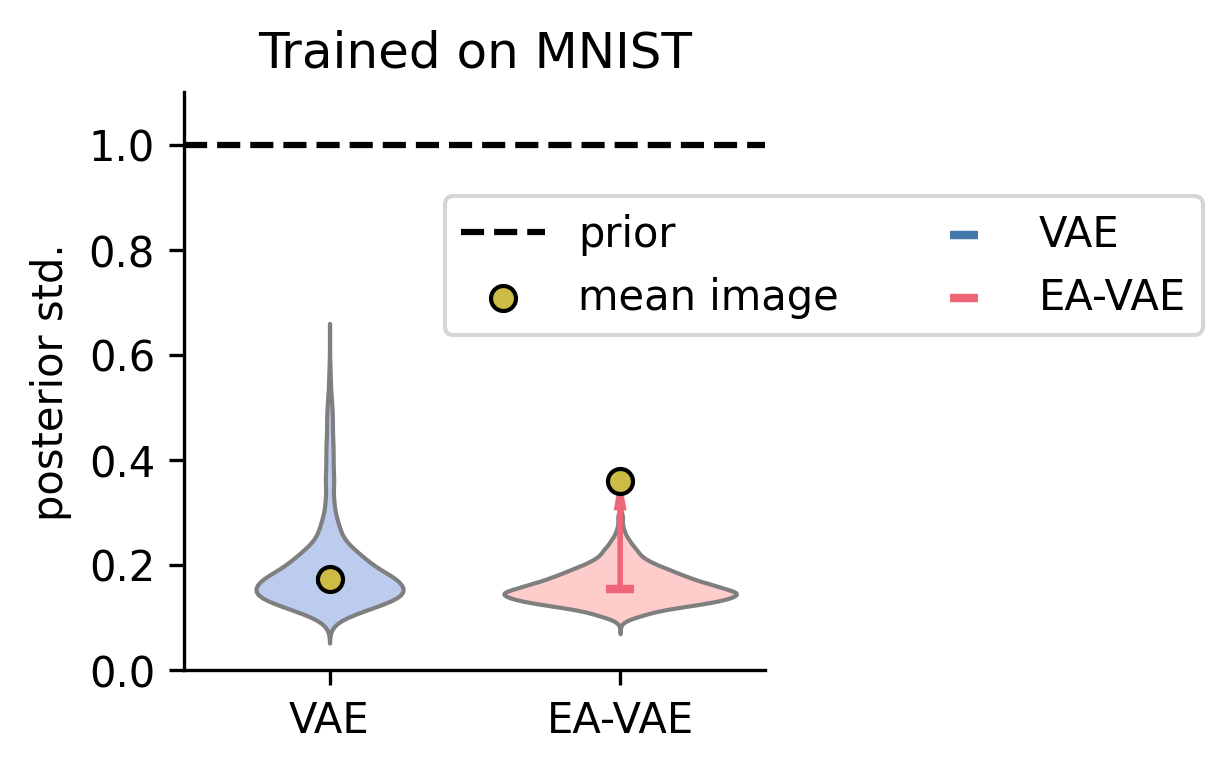

In [14]:
#noise std. MNIST data & average image
plt.figure(figsize=(2.5,2.5),facecolor=None)
sns.violinplot(data=uncertainty_vae_eavae_df, x="model", y="uncertainty", inner=None,linewidth=1.,
               palette=cmap_pale_vae_eavae,saturation=1., density_norm='area')
plt.axhline(1,color='black',ls='--',label=r'prior')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.scatter([0],[np.sqrt(num_uncertain_var_vae).mean()],edgecolor='black',color=cmap_bright[3],label='mean image',zorder=2)
plt.scatter([1],[np.sqrt(num_uncertain_var_eavae).mean()],edgecolor='black',color=cmap_bright[3],zorder=2)
#plt.arrow(0,uncertainty_vae_eavae_df[uncertainty_vae_eavae_df['model']=='VAE']['uncertainty'].median(),0,
#          np.sqrt(num_uncertain_var_vae).mean()-uncertainty_vae_eavae_df[uncertainty_vae_eavae_df['model']=='VAE']['uncertainty'].median(),
#          width = .012,length_includes_head=False, lw=.5,color=cmap_bright[0])
plt.arrow(1,uncertainty_vae_eavae_df[uncertainty_vae_eavae_df['model']=='EA-VAE']['uncertainty'].median(),0,
          np.sqrt(num_uncertain_var_eavae).mean()-uncertainty_vae_eavae_df[uncertainty_vae_eavae_df['model']=='EA-VAE']['uncertainty'].median(),
          width = .012,length_includes_head=True, lw=.5,color=cmap_bright[4])
sns.pointplot(data=uncertainty_vae_eavae_df, x="model", y="uncertainty", hue="model", estimator=np.median,
              linestyles = '',markers='_',palette=cmap_bright_vae_eavae,errwidth=0.0,zorder=1,markersize=10)
plt.ylabel('posterior std.')
plt.title('Trained on MNIST')
plt.xlabel('')
plt.xticks([0,1],['VAE','EA-VAE'])
plt.xlim(-.5,1.5)
plt.ylim(0.0,1.1)
#plt.yscale('log')
plt.legend(bbox_to_anchor=[1.1, 0.7], loc='center',ncol=2)
#plt.tight_layout()

#plt.savefig(figures_path+"mnist_uninf.svg", format="svg", dpi=300)

In [15]:
print('VAE uncertainty for average image: ', np.sqrt(num_uncertain_var_vae).mean())
print('EA-VAE uncertainty for average image: ', np.sqrt(num_uncertain_var_eavae).mean())

0.1720638
0.35994


### Average posterior for images with the same label (’0’ in green and ’1’ in orange) 

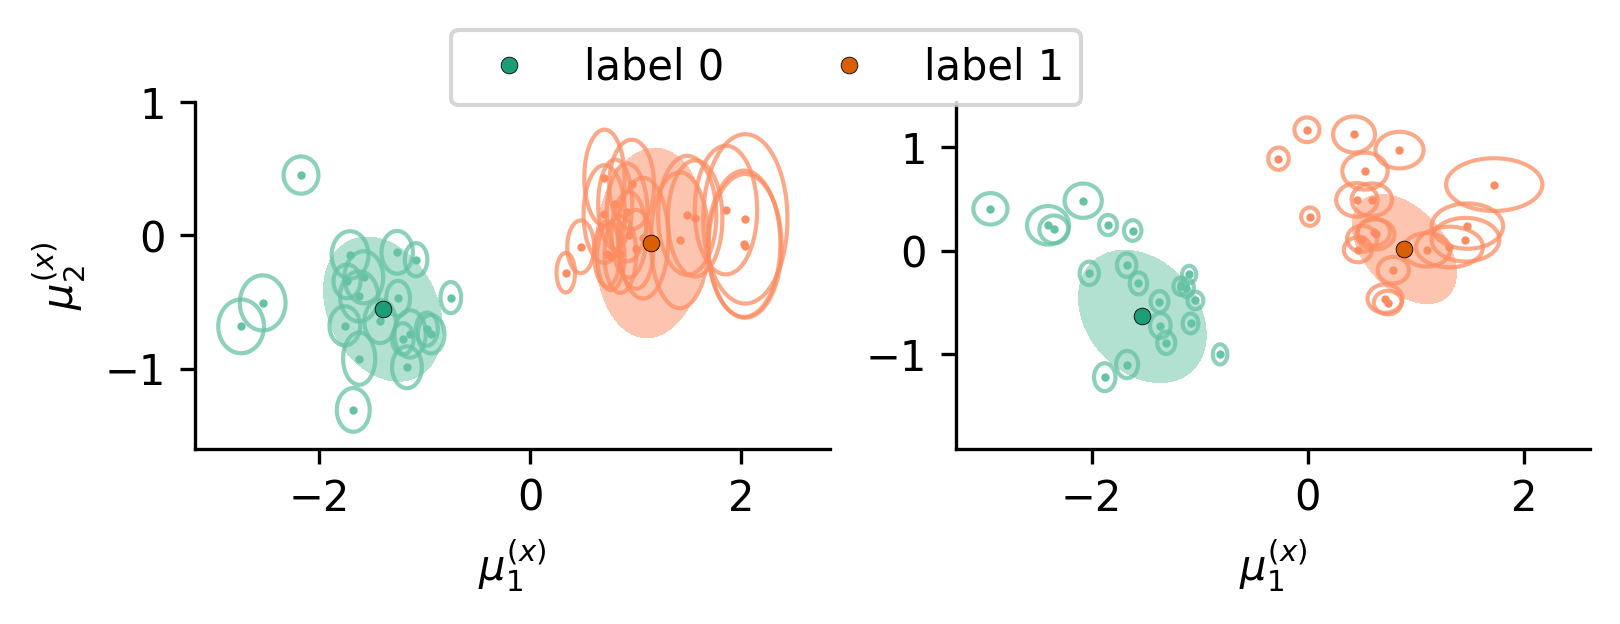

In [17]:
plt.figure(figsize=(6,1.5))
plt.subplot(1,2,1)
plt.plot(test_category_mu_vae[0][0],test_category_mu_vae[0][1],'o',color='black',markerfacecolor=sns.color_palette("Dark2")[0],markersize=4,markeredgewidth=.2,label='label 0',zorder = 2)
plt.plot(test_category_mu_vae[1][0],test_category_mu_vae[1][1],'o',color='black',markerfacecolor=sns.color_palette("Dark2")[1],markersize=4,markeredgewidth=.2,label='label 1',zorder = 2)
z = gauss2d(label = 0,mu=np.array([test_category_mu_vae[0][0],test_category_mu_vae[0][1]]), cov=test_category_cov_vae[0][:2,:2].T, to_plot_inside=True)
z = gauss2d(label = 1,mu=np.array([test_category_mu_vae[1][0],test_category_mu_vae[1][1]]), cov=test_category_cov_vae[1][:2,:2].T, to_plot_inside=True)
for j in range(20):
    z = gauss2d(label = 0,mu=np.array([num_test_mu_vae[test_indexes_per_category[0]][j,0],num_test_mu_vae[test_indexes_per_category[0]][j,1]]), sigma=np.array([np.sqrt(num_test_var_vae[test_indexes_per_category[0]][j,0]),np.sqrt(num_test_var_vae[test_indexes_per_category[0]][j,1])]), to_plot_contour=True)
    z = gauss2d(label = 1,mu=np.array([num_test_mu_vae[test_indexes_per_category[1]][j,0],num_test_mu_vae[test_indexes_per_category[1]][j,1]]), sigma=np.array([np.sqrt(num_test_var_vae[test_indexes_per_category[1]][j,0]),np.sqrt(num_test_var_vae[test_indexes_per_category[1]][j,1])]), to_plot_contour=True)
#plt.plot(num_test_mu_vae[test_indexes_per_category[2]][:20,0],num_test_mu_vae[test_indexes_per_category[2]][:20,1],'.',label='label 2')
plt.plot(num_test_mu_vae[test_indexes_per_category[0]][:20,0],num_test_mu_vae[test_indexes_per_category[0]][:20,1],'.',ms=2,color=sns.color_palette("Set2")[0],zorder=1)
plt.plot(num_test_mu_vae[test_indexes_per_category[1]][:20,0],num_test_mu_vae[test_indexes_per_category[1]][:20,1],'.',ms=2,color=sns.color_palette("Set2")[1],zorder=1)
plt.xlabel(r'$\mu_1^{(x)}$')
plt.ylabel(r'$\mu_2^{(x)}$')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.ylim(-1.6,1)


plt.subplot(1,2,2)
plt.plot(test_category_mu_eavae[0][0],test_category_mu_eavae[0][1],'o',color='black',markerfacecolor=sns.color_palette("Dark2")[0],markersize=4,markeredgewidth=.2,label='label 0',zorder = 2)
plt.plot(test_category_mu_eavae[1][0],test_category_mu_eavae[1][1],'o',color='black',markerfacecolor=sns.color_palette("Dark2")[1],markersize=4,markeredgewidth=.2,label='label 1',zorder = 2)
z = gauss2d(label = 0,mu=np.array([test_category_mu_eavae[0][0],test_category_mu_eavae[0][1]]), cov=test_category_cov_eavae[0][:2,:2].T, to_plot_inside=True)
z = gauss2d(label = 1,mu=np.array([test_category_mu_eavae[1][0],test_category_mu_eavae[1][1]]), cov=test_category_cov_eavae[1][:2,:2].T, to_plot_inside=True)
for j in range(20):
    z = gauss2d(label = 0,mu=np.array([num_test_mu_eavae[test_indexes_per_category[0]][j,0],num_test_mu_eavae[test_indexes_per_category[0]][j,1]]), sigma=np.array([np.sqrt(num_test_var_eavae[test_indexes_per_category[0]][j,0]),np.sqrt(num_test_var_eavae[test_indexes_per_category[0]][j,1])]), to_plot_contour=True)
    z = gauss2d(label = 1,mu=np.array([num_test_mu_eavae[test_indexes_per_category[1]][j,0],num_test_mu_eavae[test_indexes_per_category[1]][j,1]]), sigma=np.array([np.sqrt(num_test_var_eavae[test_indexes_per_category[1]][j,0]),np.sqrt(num_test_var_eavae[test_indexes_per_category[1]][j,1])]), to_plot_contour=True)
#plt.plot(num_test_mu_eavae[test_indexes_per_category[2]][:20,0],num_test_mu_eavae[test_indexes_per_category[2]][:20,1],'.',label='label 2')
plt.plot(num_test_mu_eavae[test_indexes_per_category[0]][:20,0],num_test_mu_eavae[test_indexes_per_category[0]][:20,1],'.',ms=2,color=sns.color_palette("Set2")[0],zorder=1)
plt.plot(num_test_mu_eavae[test_indexes_per_category[1]][:20,0],num_test_mu_eavae[test_indexes_per_category[1]][:20,1],'.',ms=2,color=sns.color_palette("Set2")[1],zorder=1)
plt.xlabel(r'$\mu_1^{(x)}$')
#plt.ylabel(r'$\mu_2^{(x)}$')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.legend(bbox_to_anchor=[-.3, 1.1], loc='center',ncol=2)
#plt.savefig(figures_path+"latent_labels.svg", format="svg", dpi=300)

### Uncertainty for morphing digits

/tmp/ipykernel_17901/4270005268.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


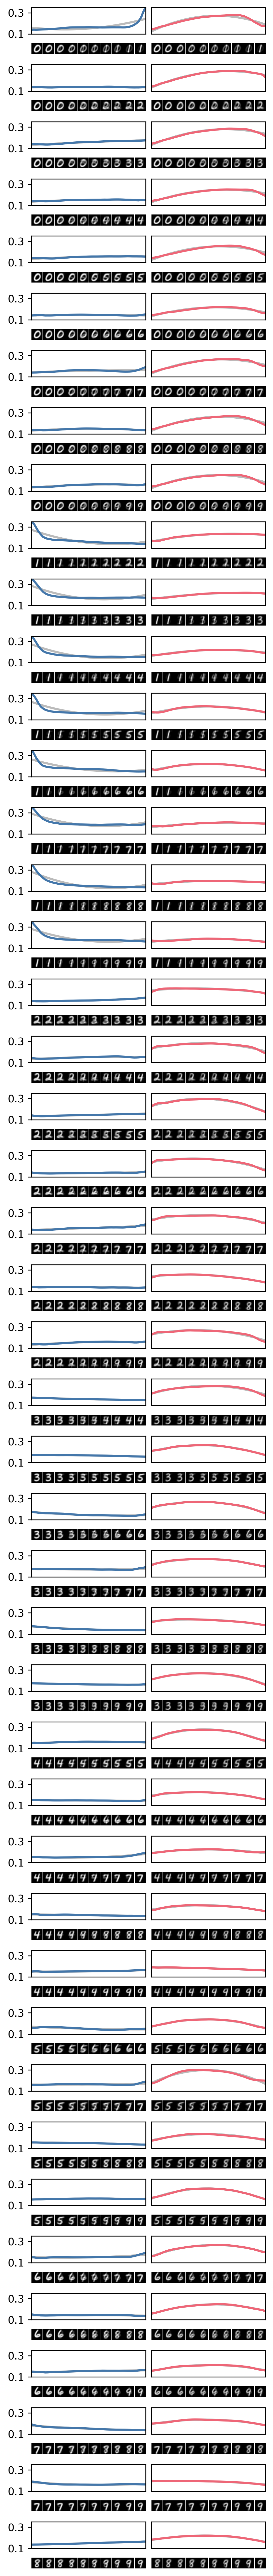

In [37]:
#Noise std. for morphing digits
fig_merged = plt.figure(figsize=(4, 45))
gs = gridspec.GridSpec(45,2, wspace=0.05, hspace=0.05)

l=0

lam_int = np.linspace(0, 1, 51)
for i in range(10):
    for j in range(i+1,10):


        # Create a subgrid for the current position
        subgrid_vae = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[l,0], hspace=0.05)
        subgrid_eavae = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[l,1], hspace=0.05)

        # Add the subplots to the subgrid
        ax_merged1 = fig_merged.add_subplot(subgrid_vae[0, 0])
        ax_merged1.plot(lam_int, int_cat_unc_vaes[l], color=cmap_bright[0],alpha=1., lw=2,zorder=1)
        ax_merged1.plot(lam_int, np.polyval(vae_fit[i,j],lam_int), color=cmap_bright[5],alpha=1, lw=2,zorder=0)
        ax_merged1.set_xlim(0, 1)
        ax_merged1.set_ylim(0.1, 0.35)
        ax_merged1.set_xticks([])
        ax_merged1.set_yticks([0.1,0.3])

        ax_merged2 = fig_merged.add_subplot(subgrid_eavae[0, 0])
        ax_merged2.plot(lam_int, int_cat_unc_eavaes[l], color=cmap_bright[4],alpha=1., lw=2,zorder=1)
        ax_merged2.plot(lam_int, np.polyval(eavae_fit[i,j],lam_int), color=cmap_bright[5],alpha=1, lw=2,zorder=0)
        ax_merged2.set_xlim(0, 1)
        ax_merged2.set_ylim(0.1, 0.35)
        ax_merged2.set_xticks([])
        ax_merged2.set_yticks([])

        # Create a subgrid for the lower figure
        subsubgrid_vae = gridspec.GridSpecFromSubplotSpec(1, 10, subplot_spec=subgrid_vae[1, 0], wspace=0.05)
        subsubgrid_eavae = gridspec.GridSpecFromSubplotSpec(1, 10, subplot_spec=subgrid_eavae[1, 0], wspace=0.05)
        for k in range(10):
            ax_vae = fig_merged.add_subplot(subsubgrid_vae[k])
            ax_vae.imshow(interpolation_img_in_vaes[l][k*5].reshape(32,32).squeeze(), aspect="auto", cmap='gray', vmin=0, vmax=1)
            ax_vae.set_aspect("equal")
            ax_vae.axis("off")
            ax_eavae = fig_merged.add_subplot(subsubgrid_eavae[k])
            ax_eavae.imshow(interpolation_img_in_eavaes[l][k*5].reshape(32,32).squeeze(), aspect="auto", cmap='gray', vmin=0, vmax=1)
            ax_eavae.set_aspect("equal")
            ax_eavae.axis("off")


        l+=1

# Optionaly, adjust labels and titles if needed

# Show the merged figure
plt.tight_layout()
#plt.savefig(figures_path+"mnist_morphing_all.svg", format="svg", dpi=300)

### Rate of morphings for which max. uncertainty lives within centered window

In [16]:
vae_in = []
eavae_in = []
for thr in np.linspace(0,.5,51):
    vae_in.append(((.5-thr<((-vae_fit[:,:,1]/(2*vae_fit[:,:,0])).flatten())) * (((-vae_fit[:,:,1]/(2*vae_fit[:,:,0])).flatten())<.5+thr) * ((vae_fit[:,:,0]).flatten()<0)).sum()/45)
    eavae_in.append(((.5-thr<((-eavae_fit[:,:,1]/(2*eavae_fit[:,:,0])).flatten())) * (((-eavae_fit[:,:,1]/(2*eavae_fit[:,:,0])).flatten())<.5+thr) * ((eavae_fit[:,:,0]).flatten()<0)).sum()/45)

/tmp/ipykernel_10048/1337229560.py:4: RuntimeWarning: invalid value encountered in divide
  vae_in.append(((.5-thr<((-vae_fit[:,:,1]/(2*vae_fit[:,:,0])).flatten())) * (((-vae_fit[:,:,1]/(2*vae_fit[:,:,0])).flatten())<.5+thr) * ((vae_fit[:,:,0]).flatten()<0)).sum()/45)
/tmp/ipykernel_10048/1337229560.py:5: RuntimeWarning: invalid value encountered in divide
  eavae_in.append(((.5-thr<((-eavae_fit[:,:,1]/(2*eavae_fit[:,:,0])).flatten())) * (((-eavae_fit[:,:,1]/(2*eavae_fit[:,:,0])).flatten())<.5+thr) * ((eavae_fit[:,:,0]).flatten()<0)).sum()/45)


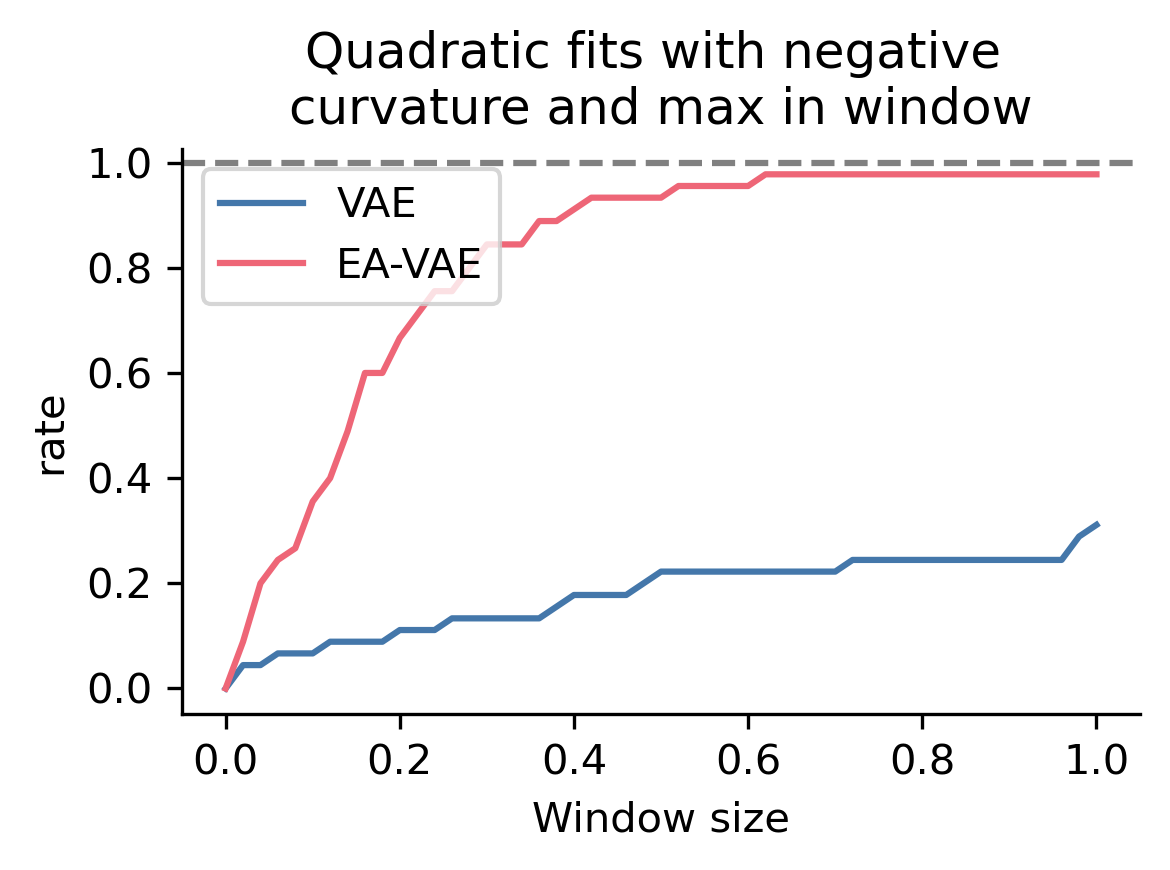

In [39]:
plt.figure(figsize=(4,3))
plt.title('Quadratic fits with negative \ncurvature and max in window')
plt.plot(2*np.linspace(0,.5,51),vae_in,color=color_vae, label='VAE')
plt.plot(2*np.linspace(0,.5,51),eavae_in,color=color_eavae, label='EA-VAE')
plt.axhline(1,ls='--',color='gray')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.ylabel('rate')
plt.xlabel('Window size')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig(figures_path+"mnist_morphing_all_maxs.svg", format="svg", dpi=300)

### Classification task: Entropy for OOD images and for morphing digits

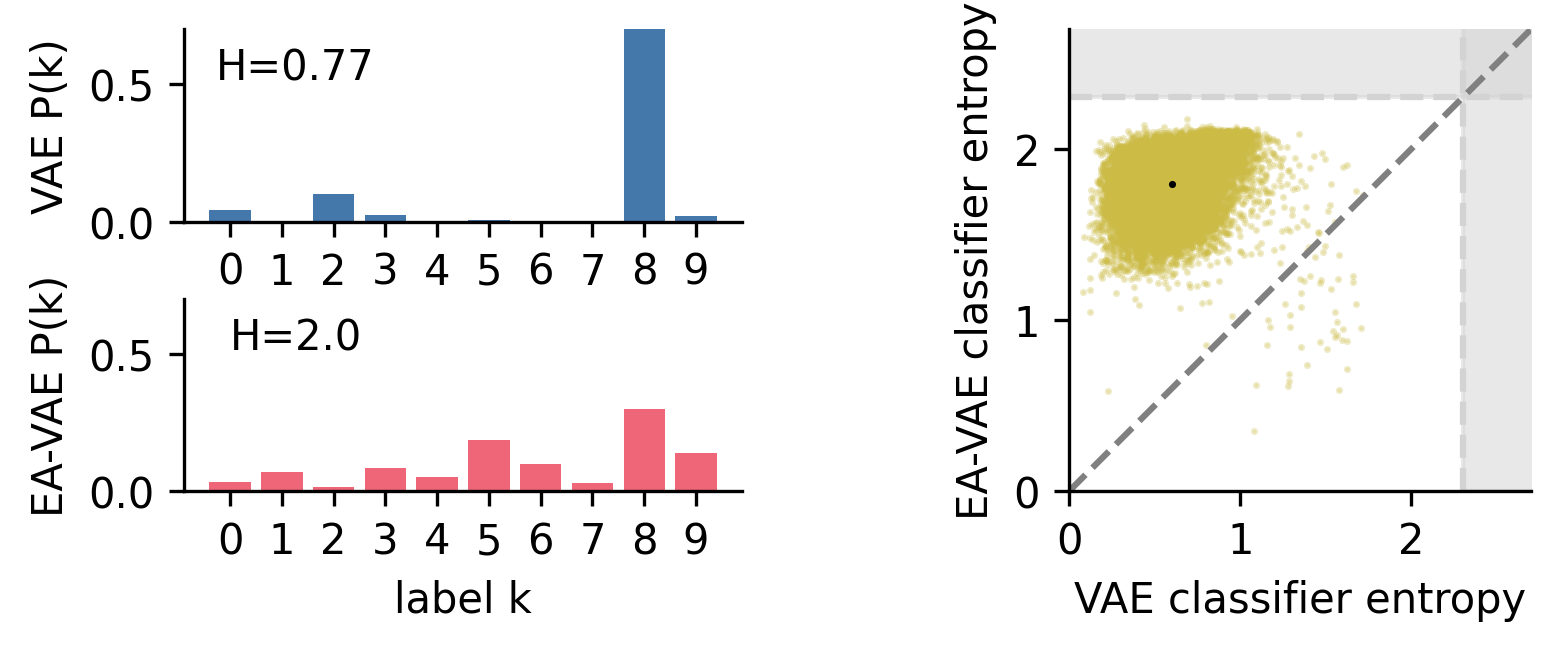

In [ ]:
#OOD ChestMNIST images. Classification VAE vs EAVAE
ind = 7
fig = plt.figure(figsize=(6, 2))
outer = gridspec.GridSpec(1, 2, wspace=0.5, hspace=0.2)

inner0 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[0], wspace=0.1, hspace=0.4)
inner1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[1], wspace=0.1, hspace=0.1)

ax1 = plt.Subplot(fig, inner0[0])
ax1.bar(np.arange(10),med_mat_vae[ind],color=cmap_bright[0])
ax1.set_ylim(0,0.7)
ax1.set_xticks(np.arange(10))
ax1.set_ylabel('VAE P(k)')
ax1.spines[['right', 'top']].set_visible(False)
ax1.text(0.2, .8, 'H='+str(np.round(scipy.stats.entropy(med_mat_vae[ind]),2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
fig.add_subplot(ax1)
ax2 = plt.Subplot(fig, inner0[1])
ax2.bar(np.arange(10),med_mat_eavae[ind],color=cmap_bright[4])
ax2.set_xticks(np.arange(10))
ax2.set_ylim(0,0.7)
ax2.set_xlabel('label k')
ax2.set_ylabel('EA-VAE P(k)')
ax2.spines[['right', 'top']].set_visible(False)
ax2.text(0.2, .8, 'H='+str(np.round(scipy.stats.entropy(med_mat_eavae[ind]),2)), horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
fig.add_subplot(ax2)
ax3 = plt.Subplot(fig, inner1[0])
ax3.scatter(scipy.stats.entropy(med_mat_vae,axis=1),scipy.stats.entropy(med_mat_eavae,axis=1),s=.5,color=cmap_bright[3],alpha=.3)
ax3.scatter(scipy.stats.entropy(med_mat_vae,axis=1).mean(),scipy.stats.entropy(med_mat_eavae,axis=1).mean(),s=.5,color='black')
ax3.vlines(np.log(10),ymin=0,ymax=3,ls='--',color='lightgray')
ax3.hlines(np.log(10),xmin=0,xmax=3,ls='--',color='lightgray')
ax3.plot([0,3],[0,3],'--',color='gray')
ax3.fill_between([0,3],[np.log(10),np.log(10)],y2=[3,3],color='lightgray',alpha=.5)
ax3.fill_betweenx([0,3],x1=[np.log(10),np.log(10)],x2=[3,3],color='lightgray',alpha=.5)
ax3.set_xlim(0,2.7)
ax3.set_ylim(0,2.7)
ax3.set_aspect('equal')
ax3.set_xticks([0,1,2])
ax3.set_yticks([0,1,2])
ax3.set_xlabel('VAE classifier entropy')
ax3.set_ylabel('EA-VAE classifier entropy')
ax3.spines[['right', 'top']].set_visible(False)
fig.add_subplot(ax3)

#plt.savefig(figures_path+"preds_chest.svg", format="svg", dpi=300)

/tmp/ipykernel_17901/3266520716.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


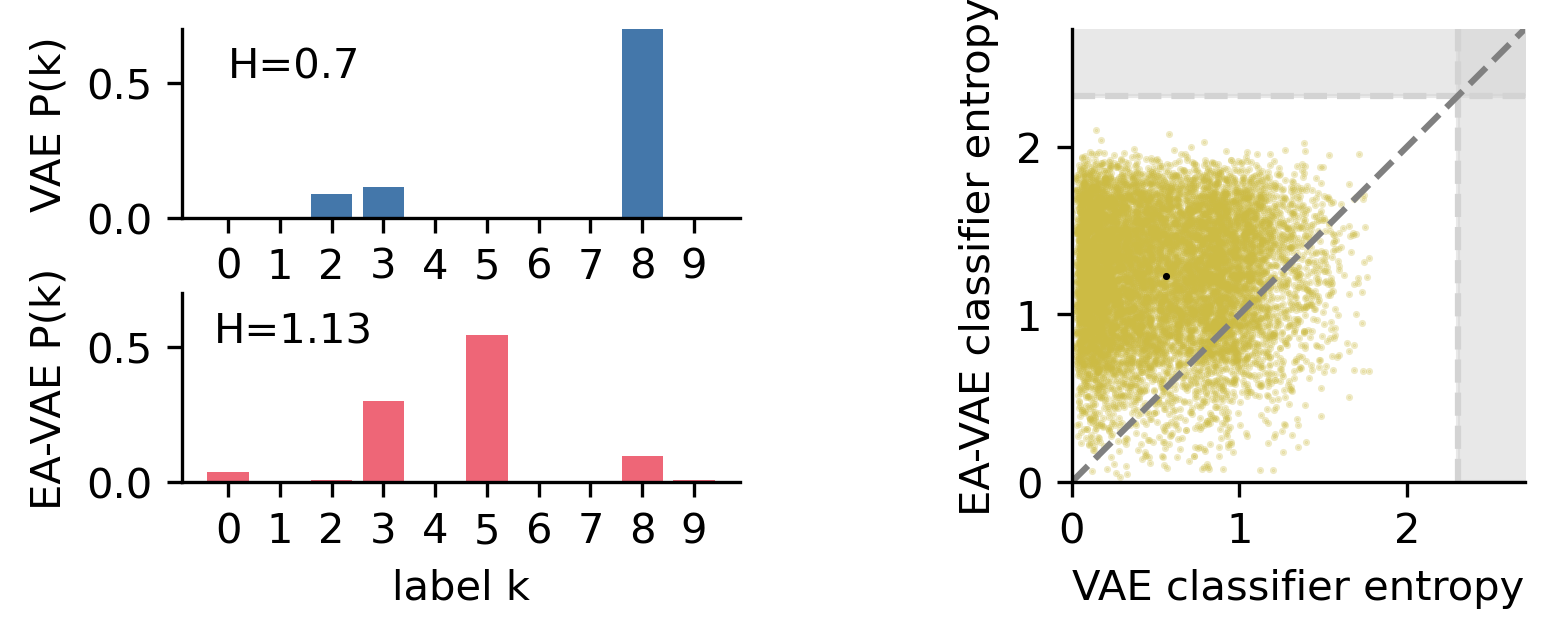

In [41]:
#OOD Shuffled-pixels images. Classification VAE vs EAVAE
ind = 6
fig = plt.figure(figsize=(6, 2))
outer = gridspec.GridSpec(1, 2, wspace=0.5, hspace=0.2)

inner0 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[0], wspace=0.1, hspace=0.4)
inner1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[1], wspace=0.1, hspace=0.1)

ax1 = plt.Subplot(fig, inner0[0])
ax1.bar(np.arange(10),shuff_mat_vae[ind],color=cmap_bright[0])
ax1.set_ylim(0,0.7)
ax1.set_xticks(np.arange(10))
ax1.set_ylabel('VAE P(k)')
ax1.spines[['right', 'top']].set_visible(False)
ax1.text(0.2, .8, 'H='+str(np.round(scipy.stats.entropy(shuff_mat_vae[ind]),2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
fig.add_subplot(ax1)
ax2 = plt.Subplot(fig, inner0[1])
ax2.bar(np.arange(10),shuff_mat_eavae[ind],color=cmap_bright[4])
ax2.set_xticks(np.arange(10))
ax2.set_ylim(0,0.7)
ax2.set_xlabel('label k')
ax2.set_ylabel('EA-VAE P(k)')
ax2.spines[['right', 'top']].set_visible(False)
ax2.text(0.2, .8, 'H='+str(np.round(scipy.stats.entropy(shuff_mat_eavae[ind]),2)), horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
fig.add_subplot(ax2)
ax3 = plt.Subplot(fig, inner1[0])
ax3.scatter(scipy.stats.entropy(shuff_mat_vae,axis=1),scipy.stats.entropy(shuff_mat_eavae,axis=1),s=.5,color=cmap_bright[3],alpha=.3)
ax3.scatter(scipy.stats.entropy(shuff_mat_vae,axis=1).mean(),scipy.stats.entropy(shuff_mat_eavae,axis=1).mean(),s=.5,color='black')
ax3.vlines(np.log(10),ymin=0,ymax=3,ls='--',color='lightgray')
ax3.hlines(np.log(10),xmin=0,xmax=3,ls='--',color='lightgray')
ax3.plot([0,3],[0,3],'--',color='gray')
ax3.fill_between([0,3],[np.log(10),np.log(10)],y2=[3,3],color='lightgray',alpha=.5)
ax3.fill_betweenx([0,3],x1=[np.log(10),np.log(10)],x2=[3,3],color='lightgray',alpha=.5)
ax3.set_xlim(0,2.7)
ax3.set_ylim(0,2.7)
ax3.set_aspect('equal')
ax3.set_xticks([0,1,2])
ax3.set_yticks([0,1,2])
ax3.set_xlabel('VAE classifier entropy')
ax3.set_ylabel('EA-VAE classifier entropy')
ax3.spines[['right', 'top']].set_visible(False)
fig.add_subplot(ax3)
fig.tight_layout()
#plt.savefig(figures_path+"preds_shuff.svg", format="svg", dpi=300)

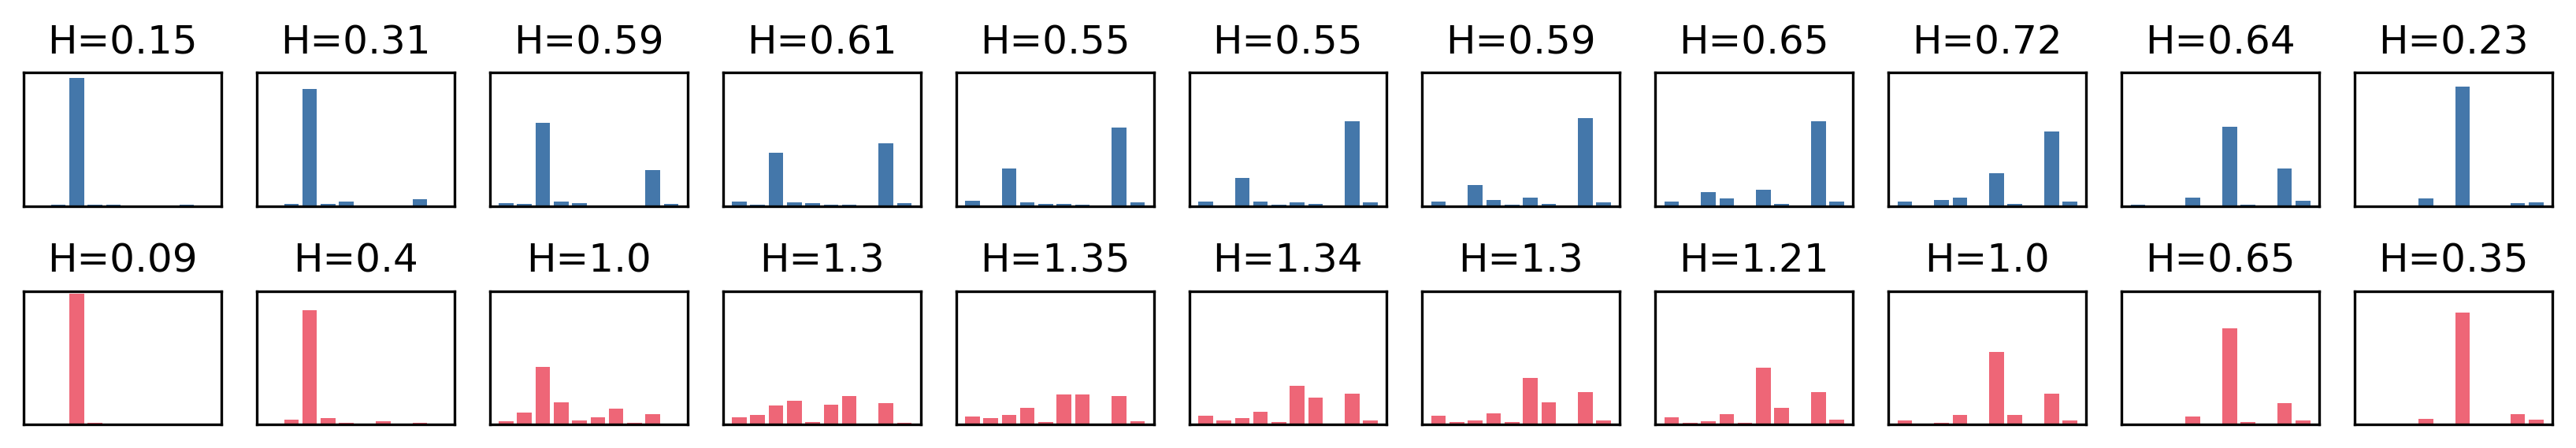

In [43]:
#Morphing Digits Classification Example: from 2 to 5
i=2
j=5
k = 19
plt.figure(figsize=(11,2))
plt.gcf().set_facecolor('white')
for i in range(11):
    plt.subplot(2,11,i+1)
    plt.bar(np.arange(10),predicts_vae[i],color=cmap_bright[0])
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0,1)
    plt.title('H='+str(np.round(entropies_all_vae[k][i],2)))

    plt.subplot(2,11,i+12)
    plt.bar(np.arange(10),predicts_eavae[i],color=cmap_bright[4])
    plt.ylim(0,1)
    plt.xticks([])
    plt.yticks([])
    plt.title('H='+str(np.round(entropies_all_eavae[k][i],2)))

plt.tight_layout()
#plt.savefig(figures_path+"preds_and_entropy_mixture.svg", format="svg", dpi=300)


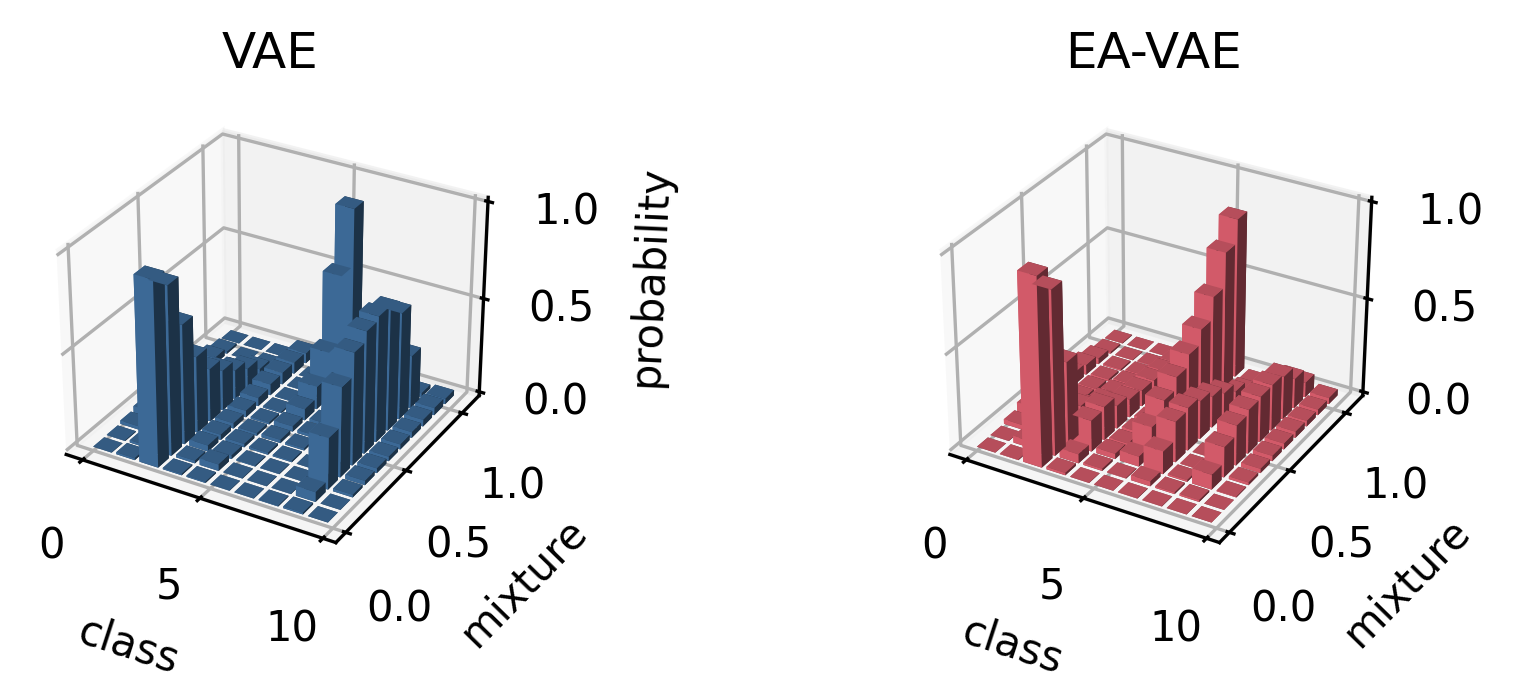

In [ ]:
# Plotting
fig = plt.figure(figsize=(6,2))

# VAE model
ax1 = fig.add_subplot(121, projection='3d')
create_3d_histogram(ax1, predicts_vae, color_vae, 'VAE')

# EAVAE model
ax2 = fig.add_subplot(122, projection='3d')
create_3d_histogram(ax2, predicts_eavae, color_eavae, 'EA-VAE')

# Adjust layout to prevent labels from being cropped
fig.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.2)
#plt.savefig(figures_path+"preds_mixture.svg", format="svg", dpi=300)
plt.show()

Text(0, 0.5, 'entropy')

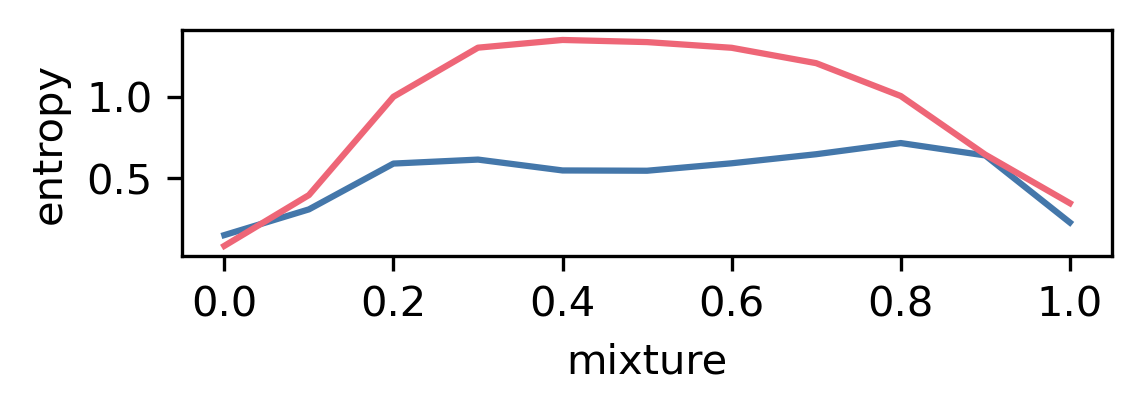

In [45]:
#Entropy across interpolation path
plt.figure(figsize=(4,1))
j=0
for l in range(10):
    for i in range(10):
        if l==2 and i==5:
            plt.plot(np.linspace(0,1,11),entropies_all_vae[j],color=cmap_bright[0],label='VAE')
            plt.plot(np.linspace(0,1,11),entropies_all_eavae[j],color=cmap_bright[4],label='EAVAE')

        if i>l:
            j+=1

plt.xlabel('mixture')
plt.ylabel('entropy')
#plt.legend()

#plt.savefig(figures_path+"entropy_mixture.svg", format="svg", dpi=300)

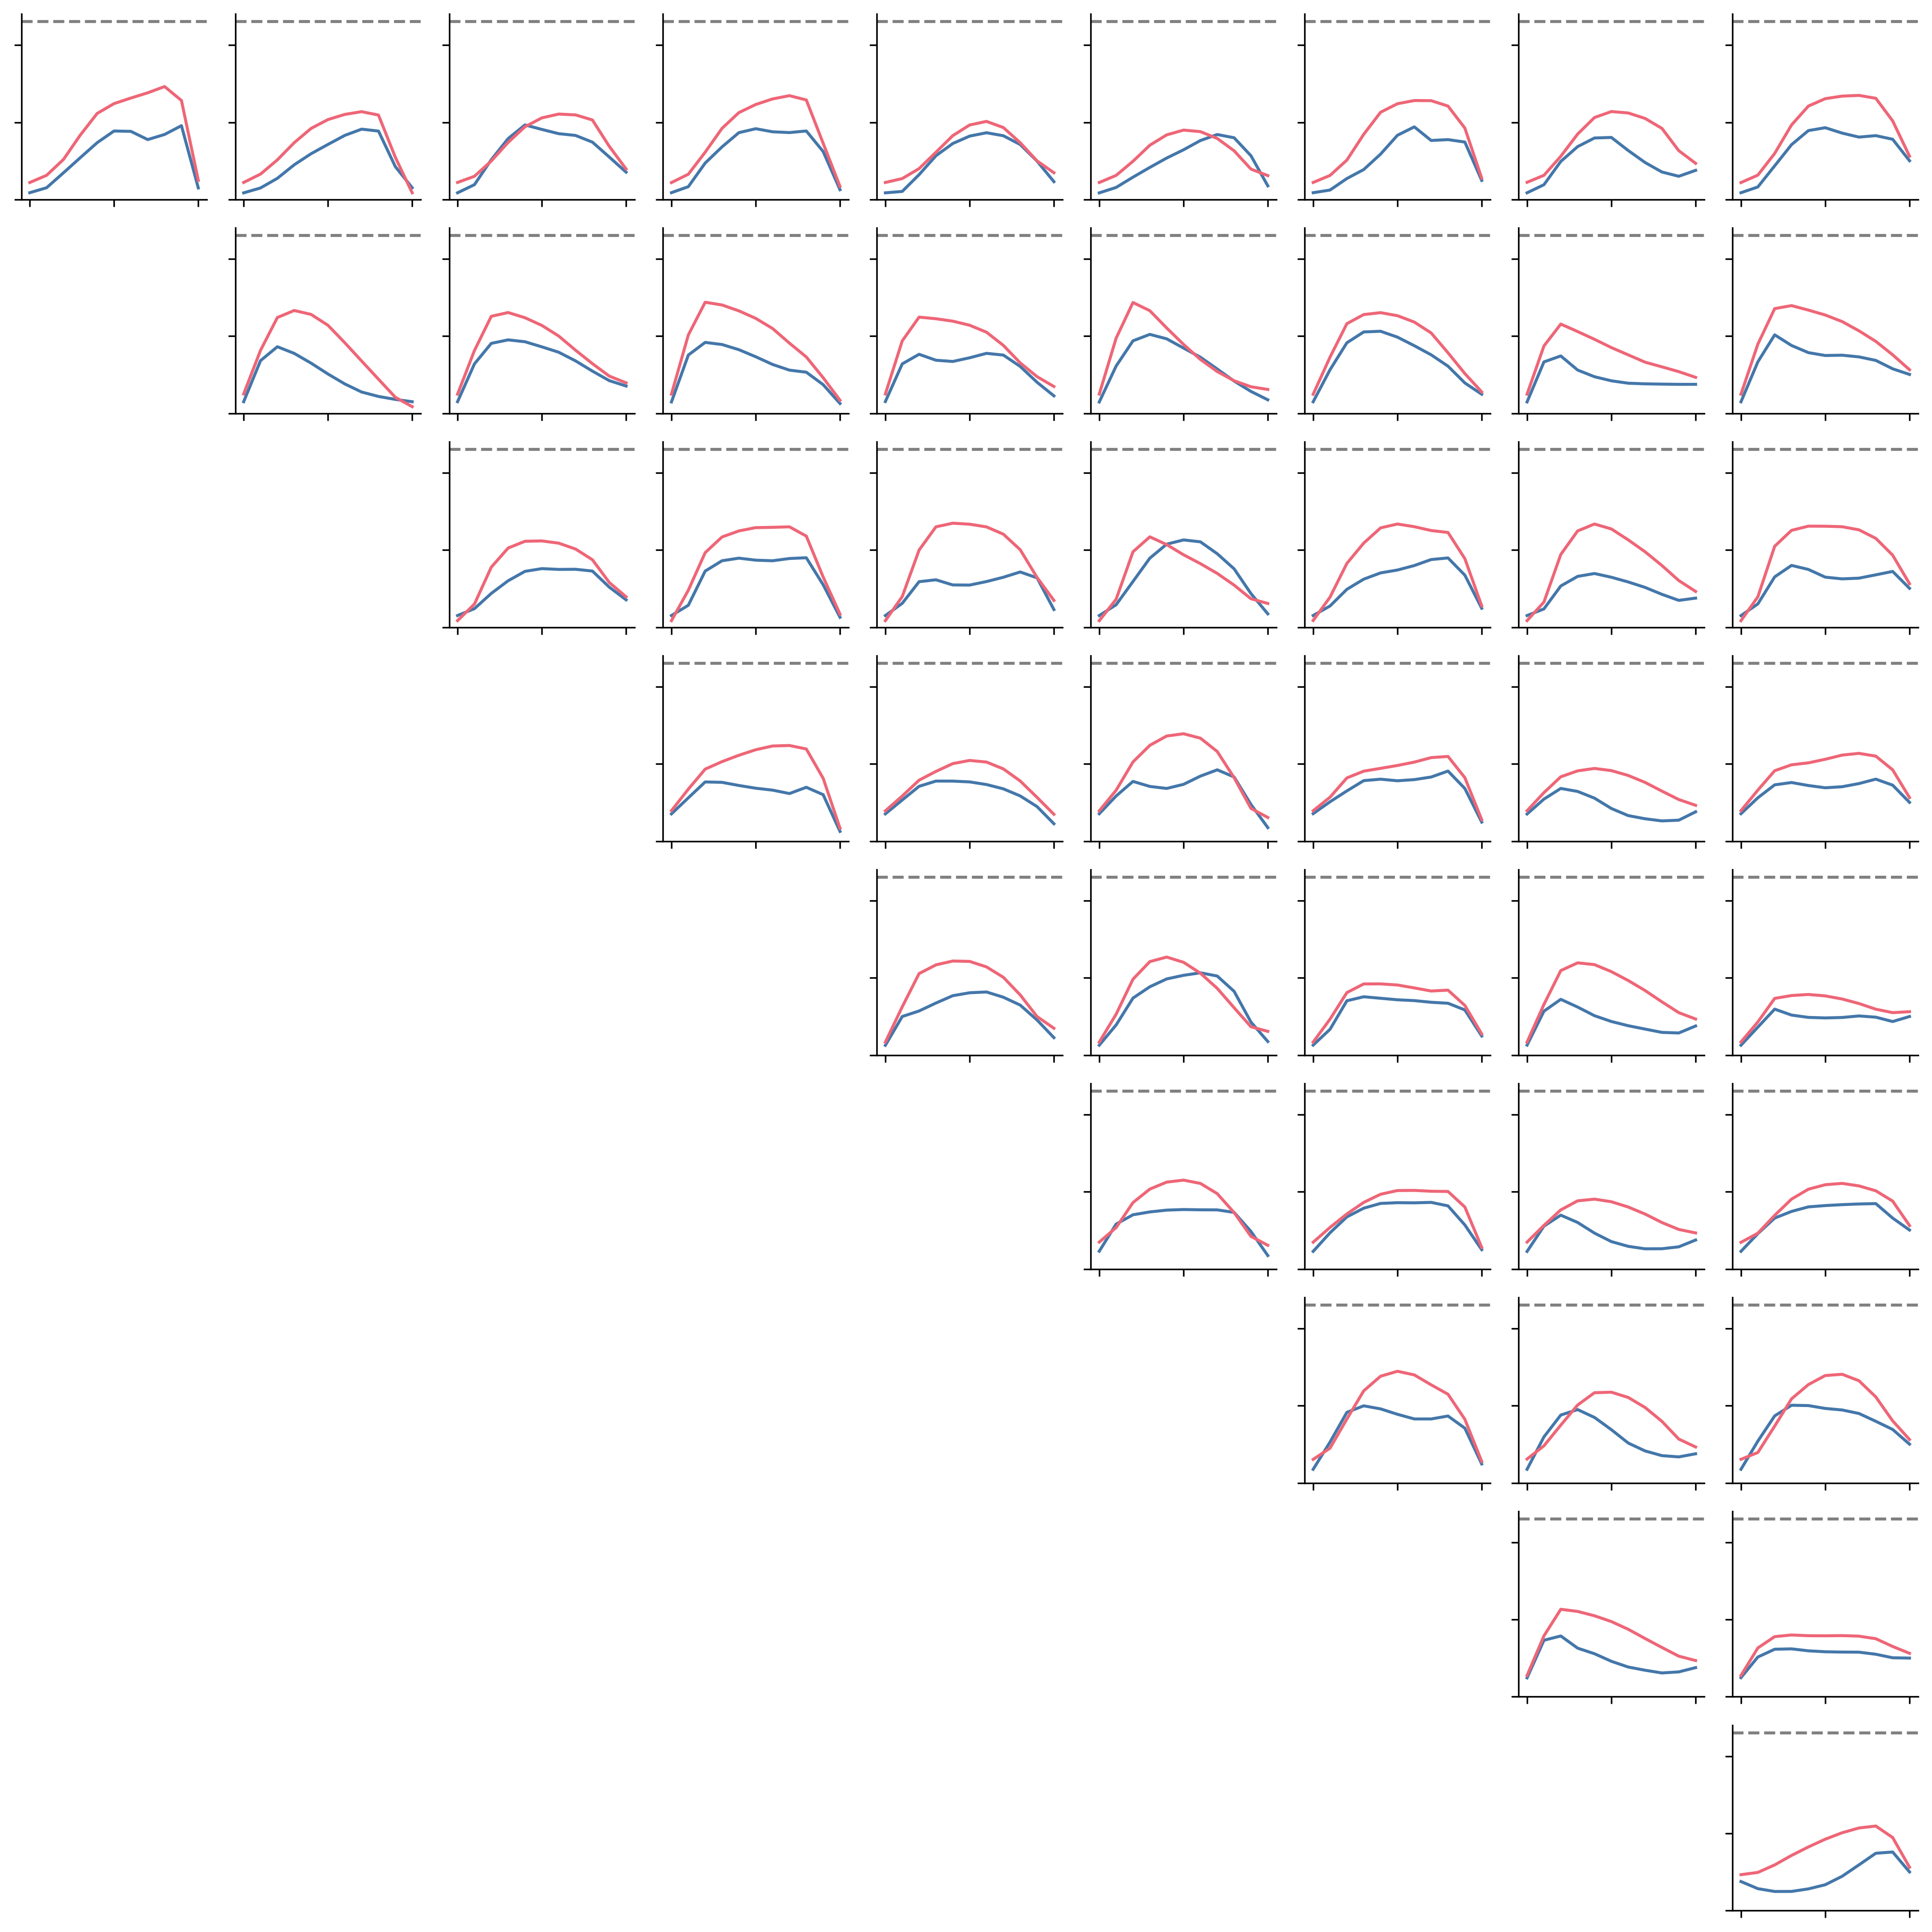

In [46]:
plt.figure(figsize=(15,15))
j=0
for l in range(10):
    for i in range(10):
        if i>l:
            plt.subplot(10,10,l*10+i+1)
            plt.plot(np.linspace(0,1,11),entropies_all_vae[j],'#4477AA',label='VAE')
            plt.plot(np.linspace(0,1,11),entropies_all_eavae[j],'#EE6677',label='EA-VAE')
            plt.axhline(np.log(10),ls='--',color='gray')
            plt.xlabel('')
            plt.ylabel('')
            plt.xlim(-.05,1.05)
            plt.ylim(0,np.log(10)+.1)
            plt.xticks([0,0.5,1],['','',''])
            plt.yticks([0,1,2],['','',''])
            plt.gca().spines[['right', 'top']].set_visible(False)
            j+=1
plt.tight_layout()
#plt.savefig(figures_path+"entropy_all.svg", format="svg", dpi=300)

In [47]:
# t-test for difference in entropy between EA-VAE and VAE
d_bar = (entropies_all_eavae-entropies_all_vae).sum(axis=1).mean()
d_std = (entropies_all_eavae-entropies_all_vae).sum(axis=1).std()
n = len((entropies_all_eavae-entropies_all_vae).sum(axis=1))
t = d_bar/(d_std/np.sqrt(n))
nu = n-1
#quantile of t student of nu dof at percentile 0.95
print('t: ', t)
print('t_lim: ', scipy.stats.t.ppf(0.95,nu))
print('p-value: ',1-scipy.stats.t.cdf(t,nu))

t:  17.050124798125196
t_lim:  1.6802299753652514
p-value:  0.0
